# Physics 240 
## Intermediate Physics Laboratory
## FINAL EXAM

### Instructions: 
Answer the following questions and typeset your answers within this notebook, 
using a mix of markdown and LaTeX code. Some of your work will likely be done
by hand; for this work, make sure to turn in these calculations, but still put the 
answers in this Jupyter Notebook. 

Follow the steps below and answer the questions as indicated.

In [1]:
## This cell installs custom CSS Cell Styles obtained from 
## Prof. Lorena Barba at https://github.com/barbagroup/AeroPython 
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

## Step 1: Create a GitHub Repository and make an initial commit.
    a. Create a folder in your Documents folder called LastnameFirstname240FinalExam.
    b. Create a new repository within this folder called 240FinalExam
    c. Save this file into the above folder as LastnameFirstnameAnswers.ipynb 
    d. You should then see an uncommitted change to the 240FinalExam repository; name this "initial commit"
    and publish the changes.
    
For example, if your name was Albert Einstein, you'd create a folder called   
    *EinsteinAlbert240FinalExam*,   
then you would create a new GitHub repository (within this folder) called   
    *240FinalExam*   
and would save this file into the folder 240FinalExam as    
    *EinsteinAlbertFinalAnswers.ipynb*   
and upload the file to your github account. 

Hint: Once you complete steps (a) and (b), you can simply close and halt this notebook (from the Jupyter Notebook file menu, and use your file system browser to drag this file into the folder 240FinalExam. Then this file's existence should show up as as an uncommitted change which you can publish (after first labelling it as the initial commit, of course). 

All of the above may be easily done by using a GitHub Gui Client available for OSX, Linux, and Windoze at:
https://github.com/gitterHQ/desktop

For the following questions, I encourage you to make and publish a new commit after you finish each question.


# Question 1
## Statistical Uncertainty with dropped velociraptors

<img src="Velociraptor.jpg" width=150 height=150>

A velociraptor is dropped from a height of 10.0 $\pm$ 0.1 meters and the fall time   
is measured to the nearest 0.01 seconds. This *experiment* is performed a dozen times with the following drop times in seconds obtained:   
1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35   
Calculate the mean value of the drop time and the root mean square uncertainty, $\Delta t_{rms}$. You may use python or---if you like suffering---your calculator. 

### Solution method :

First, add all of the values into a list and take its mean to get the mean time value.

Second, calculate $\Delta t_{rms}$ by looping through the list of times and taking $ \sqrt{(\frac{0.01}{time[i]})^2}$ for each index i in the list, and then calculating their mean.

In [1]:
import numpy as np


times = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
mean_time = np.mean(times)
print("mean time: "+str(mean_time))

unc_in_t = []

for time in times:
    unc_in_t.append(np.sqrt((0.01/time)**2))

print (r'$\Delta t_{rms}$: '+str(np.mean(unc_in_t)))

mean time: 1.41416666667
$\Delta t_{rms}$: 0.00714821233572


### Question 1 Answer

Mean time = 1.41 s   

$\Delta t_{rms}$ = 0.007 $ \approx $ 0.01 s

# Question 2
## Error Propagation; measuring g via dropped velociraptors

Suppose you assume that the velociraptor drop experiment was used to determine the acceleration due to gravity. Using your knowledge of basic kinematics (and assuming
no air resistance), calculate the experimental value of $g$ that you should report for this data.

### Solution Method:

To find g we are going to use the kinematic equation

\begin{equation}
    x_f = x_0 + v_0\Delta t + \frac{1}{2}a(\Delta t)^2
\end{equation}

which, when we solve for a, and drop the velocity term as we are releasign something from rest gives us

\begin{equation}
    a =  \frac{2(x_f - x_0)}{(\Delta t)^2}
\end{equation}

Where we substitute in g for a, and 0 for $x_f$ to get

\begin{equation}
    g =  \frac{-2x_0}{(\Delta t)^2}
\end{equation}

Now, we know the height $x_0 = 10.0 \pm 0.1$ $m$, and we have the list of time values for the twelve drops which were made. Using these two we can calculate our estimate for $g$.

To calculate the uncertainty in $g$, given that we have two different values with uncertainties in them, we are going to use the techniques of error propogation. Python does this for you with the <code>uncertainties</code> package, and this has been used for reference.

To do this manually we will use

\begin{equation}
    \Delta g = \sqrt{(\frac{\partial g}{\partial x} \Delta x)^2 + (\frac{\partial g}{\partial t}\Delta t)^2}
\end{equation}

which becomes 

\begin{equation}
    \Delta g = \sqrt{(\frac{0.1}{10.0})^2 + (\frac{0.01}{t})^2}
\end{equation}

Using this with each value of t (given that we only have one value of x), and taking its average we should get the same value for our uncertainty as the <code>uncertainties</code> package.

In [3]:
# using pythons uncertainties package for reference values
from uncertainties import ufloat

# create a list of times with uncertainties.
times_with_uncert = [ufloat(x, 0.01) for x in times]

g_with_uncert = -2*ufloat(10.0,0.1)/np.mean(times_with_uncert)**2
print("g with uncertainty: {:.5}".format(g_with_uncert))

# Now to do it by hand.
g = -2*10.0/mean_time**2
print("g {:.5}".format(g))


g_rms = []
for time in times:
    g_rms.append(np.sqrt((0.1/10.0)**2 + (0.01/time)**2))
                 
g_uncert = np.mean(g_rms)

print("g uncertainty = {:.5}".format(g_uncert))

print("\nthe method used to do it by hand is wrong. Using the uncertainties package value.")

g with uncertainty: -10.001+/-0.108
g -10.001
g uncertainty = 0.012308

the method used to do it by hand is wrong. Using the uncertainties package value.


### Question 2 Answer

g = (10.001 $\approx$ 10.0) $\pm$ (0.108 $\approx$ 0.11) $\frac{m}{s^2}$ 

# Question 3
## Determining g with a point mass pendulum via plotting

Suppose that you measure the period of a simple pendulum as a function of length   
and obtain the following data:   

Period Values ($\pm 0.1$ s) =  0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50.   
Length $(\pm 0.03)$ m =  0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500   

Knowing that the period of a simple pendulum is   
$\displaystyle T = 2π\sqrt{\frac{L}{g}}$   
and use an appropriate graph, such that the plot:   

    a. gives a straight line whose slope   
       directly gives the value of g   
    b. shows data points with error bars   
    c. includes axes labels and units   
    d. includes a best fit line to the data.   

Note that you might not be on the earth when conducting this experiment.


### Solution method:

To get $g$ as the slope of our line we'll use 

\begin{equation}
    g = \frac{4\pi^2L}{t^2}
\end{equation}

And thus will plot $T^2$ verses $4\pi^2L$

In [46]:
def linearFit(t, m, b): 
    return m*t + b

In [67]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.api as sm
% matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,12

T = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50]
L = [0.010, 0.025, 0.070, 0.10, 0.140, 0.230, 0.310, 0.350, 0.500]

y_axis = [l*4*np.pi**2 for l in L]
T_squared = [t**2 for t in T]

fitParams = curve_fit(linearFit, y_axis, T_squared)

est = sm.OLS(y_axis, T_squared)
est = est.fit()

x_prime = np.linspace(np.amin(T_squared), np.amax(T_squared), 100)
y_predicted = est.predict(x_prime)

est.summary()

/Users/samuelbphotos/anaconda/envs/py34/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2026.
Date:                Tue, 10 May 2016   Prob (F-statistic):           6.56e-11
Time:                        12:43:05   Log-Likelihood:                -8.4075
No. Observations:                   9   AIC:                             18.82
Df Residuals:                       8   BIC:                             19.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9497      0.021     45.007      0.000         0.901     0.998
==============================================================================
Omnibus:                        8.731   Durbin-Watson:                   2.718
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.335
Skew:                          -1.405   Prob(JB):                        0.189
Kurtosis:                       3.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/samuelbphotos/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


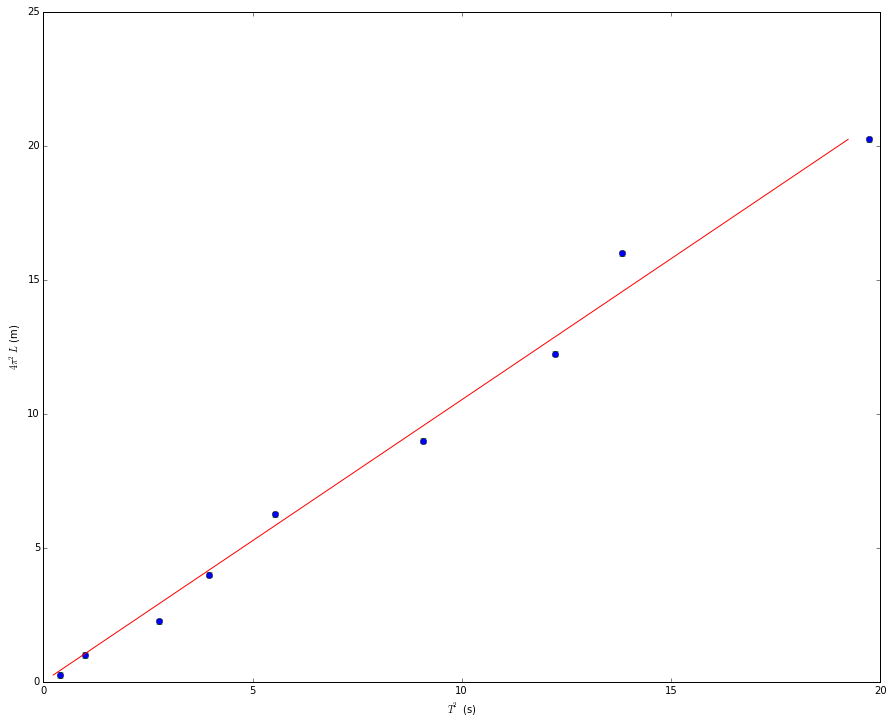

In [69]:
y_best_fit = []
for t in T_squared:
    y_best_fit.append(linearFit(t, fitParams[0][0], fitParams[0][1]))

# errorbars are not visible as they are small compared to scale of graph.
plt.errorbar(y_axis, T_squared, xerr=0.03, yerr= 0.1, linestyle='none', fmt = 'g')
plt.plot (y_axis, T_squared, 'o')
plt.plot(y_predicted, x_prime, 'r')
plt.ylabel(r'$4\pi^2L$ (m)')
plt.xlabel(r'$T^2$ (s)')
plt.show()

In [76]:
# uncertainties
x_axis_with_uncert = [ufloat(t, 0.1) for t in T_squared]
y_axis_with_uncert = [ufloat(l, 0.03) for l in y_axis]

g_with_uncert = []

for i in range(len(x_axis_with_uncert)):
    g_with_uncert.append(y_axis_with_uncert[i]/x_axis_with_uncert[i])
    
print("uncertainty in g: {:.5}".format(np.mean(g_with_uncert).s))

uncertainty in g: 0.07272


### Question 3 Answer

g = 0.95 $\pm$ $\Delta$ g = 0.07 $\frac{m}{s^2}$
 

# Final Step for online portion
## Final steps, then move on to written portion

Now make sure to commit your changes to your master copy, but before doing so, place a link to your repository in the next cell.   

Repository Link = https://github.com/samuel-barton/240FinalExam.git